___

<a href='http://www.pieriandata.com'> <img src='../Pierian_Data_Logo.png' /></a>
___
# Logistic Regression Project 

In this project we will be working with a fake advertising data set, indicating whether or not a particular internet user clicked on an Advertisement. We will try to create a model that will predict whether or not they will click on an ad based off the features of that user.

This data set contains the following features:

* 'Daily Time Spent on Site': consumer time on site in minutes
* 'Age': cutomer age in years
* 'Area Income': Avg. Income of geographical area of consumer
* 'Daily Internet Usage': Avg. minutes a day consumer is on the internet
* 'Ad Topic Line': Headline of the advertisement
* 'City': City of consumer
* 'Male': Whether or not consumer was male
* 'Country': Country of consumer
* 'Timestamp': Time at which consumer clicked on Ad or closed window
* 'Clicked on Ad': 0 or 1 indicated clicking on Ad

## Import Libraries

**Import a few libraries you think you'll need (Or just import them as you go along!)**

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


## Get the Data
**Read in the advertising.csv file and set it to a data frame called ad_data.**

In [38]:
ad_data = pd.read_csv("advertising.csv")

**Check the head of ad_data**

In [39]:
ad_data.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0


** Use info and describe() on ad_data**

In [40]:
ad_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Daily Time Spent on Site  1000 non-null   float64
 1   Age                       1000 non-null   int64  
 2   Area Income               1000 non-null   float64
 3   Daily Internet Usage      1000 non-null   float64
 4   Ad Topic Line             1000 non-null   object 
 5   City                      1000 non-null   object 
 6   Male                      1000 non-null   int64  
 7   Country                   1000 non-null   object 
 8   Timestamp                 1000 non-null   object 
 9   Clicked on Ad             1000 non-null   int64  
dtypes: float64(3), int64(3), object(4)
memory usage: 78.2+ KB


In [41]:
ad_data.describe()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Clicked on Ad
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000
mean,65.000200,36.009000,55000.000080,180.000100,0.481000,0.50000
std,15.853615,8.785562,13414.634022,43.902339,0.499889,0.50025
min,32.600000,19.000000,13996.500000,104.780000,0.000000,0.00000
25%,51.360000,29.000000,47031.802500,138.830000,0.000000,0.00000
50%,68.215000,35.000000,57012.300000,183.130000,0.000000,0.50000
75%,78.547500,42.000000,65470.635000,218.792500,1.000000,1.00000
max,91.430000,61.000000,79484.800000,269.960000,1.000000,1.00000


## Exploratory Data Analysis

Let's use seaborn to explore the data!

Try recreating the plots shown below!

** Create a histogram of the Age**

Text(0.5, 0, 'Age')

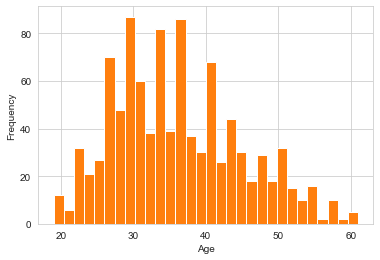

In [42]:
ad_data["Age"].plot(kind="hist", bins=30)
sns.set_style('whitegrid')
ad_data['Age'].hist(bins=30)
plt.xlabel('Age')

**Create a jointplot showing Area Income versus Age.**

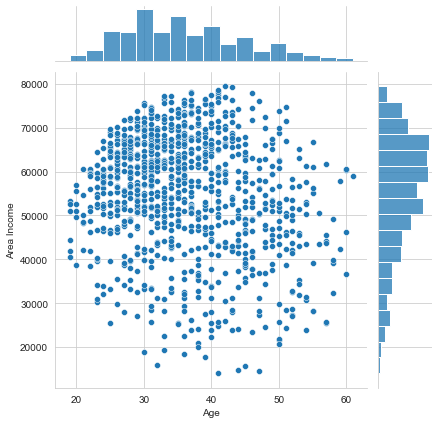

In [43]:
sns.jointplot(x="Age", y="Area Income", data = ad_data)

**Create a jointplot showing the kde distributions of Daily Time spent on site vs. Age.**

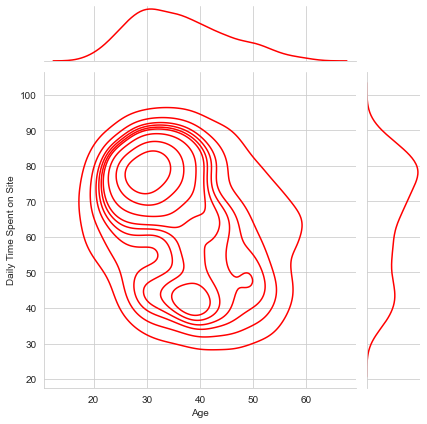

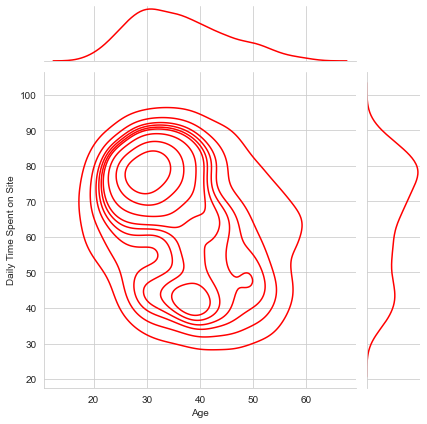

In [44]:
sns.jointplot(x="Age" , y="Daily Time Spent on Site", data=ad_data, kind="kde", color="red")
sns.jointplot(x='Age',y='Daily Time Spent on Site',data=ad_data,color='red',kind='kde');

** Create a jointplot of 'Daily Time Spent on Site' vs. 'Daily Internet Usage'**

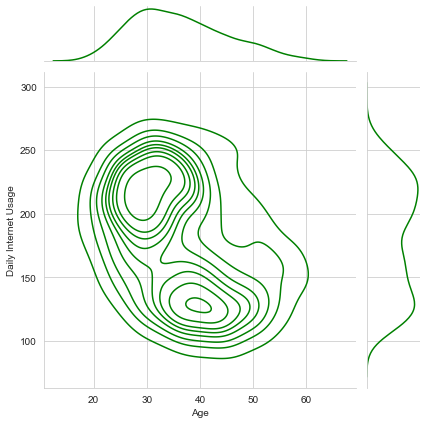

In [45]:
sns.jointplot(x='Age',y='Daily Internet Usage',data=ad_data,color='green',kind='kde');

** Finally, create a pairplot with the hue defined by the 'Clicked on Ad' column feature.**

In [46]:
ad_data

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0
...,...,...,...,...,...,...,...,...,...,...
995,72.97,30,71384.57,208.58,Fundamental modular algorithm,Duffystad,1,Lebanon,2016-02-11 21:49:00,1
996,51.30,45,67782.17,134.42,Grass-roots cohesive monitoring,New Darlene,1,Bosnia and Herzegovina,2016-04-22 02:07:01,1
997,51.63,51,42415.72,120.37,Expanded intangible solution,South Jessica,1,Mongolia,2016-02-01 17:24:57,1
998,55.55,19,41920.79,187.95,Proactive bandwidth-monitored policy,West Steven,0,Guatemala,2016-03-24 02:35:54,0


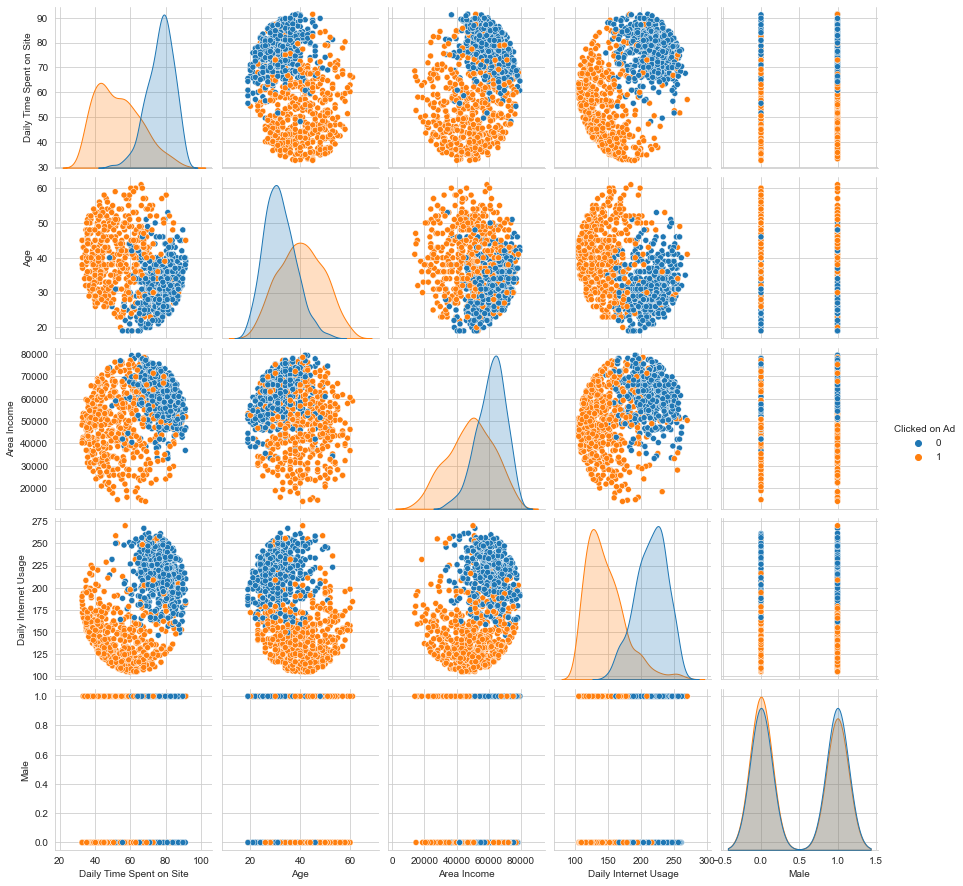

In [47]:
sns.pairplot(ad_data, hue= "Clicked on Ad")

# Logistic Regression

Now it's time to do a train test split, and train our model!

You'll have the freedom here to choose columns that you want to train on!

** Split the data into training set and testing set using train_test_split**

In [70]:
from sklearn.model_selection import train_test_split


In [71]:
ad_data.columns


Index(['Daily Time Spent on Site', 'Age', 'Area Income',
       'Daily Internet Usage', 'Ad Topic Line', 'City', 'Male', 'Country',
       'Timestamp', 'Clicked on Ad'],
      dtype='object')

In [72]:
X=ad_data[['Daily Time Spent on Site', 'Age', 'Area Income',
       'Daily Internet Usage', 'Male']]
y=ad_data["Clicked on Ad"]
X_train , X_test, y_train, y_test = train_test_split(X, y, random_state=101)

In [73]:
X_train

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male
968,45.08,38,35349.26,125.27,0
205,58.22,29,37345.24,120.90,0
231,46.77,32,31092.93,136.40,1
147,70.92,41,49995.63,108.16,1
531,53.44,42,42907.89,108.17,1
...,...,...,...,...,...
575,48.86,54,53188.69,134.46,0
838,44.13,40,33601.84,128.48,1
337,75.32,28,59998.50,233.60,1
523,67.94,43,68447.17,128.16,0


In [74]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_trainn= scaler.fit_transform(X_train)
X_testt= scaler.transform(X_test)


In [99]:
X_testt

array([[-1.38710331,  2.12142306,  0.02635879, -0.24424753, -0.97367959],
       [ 0.98727027, -0.56184692,  0.85779041,  0.82532766, -0.97367959],
       [ 0.58703847, -0.450044  ,  1.30553858,  0.72861688, -0.97367959],
       ...,
       [ 1.51881832,  0.44437932,  0.2681151 ,  0.80736709, -0.97367959],
       [ 0.97721736, -0.56184692,  0.99392997,  0.39910943, -0.97367959],
       [-0.34913952, -0.33824109, -1.9807719 , -1.25165151, -0.97367959]])

In [96]:
pd.DataFrame(X_trainn)

,0,1,2,3,4
0,-1.231283,0.220773,-1.448312,-1.234842,-0.973680
1,-0.405687,-0.785453,-1.299447,-1.335468,-0.973680
2,-1.125099,-0.450044,-1.765759,-0.978559,1.027032
3,0.392263,0.556182,-0.355952,-1.628824,1.027032
4,-0.706018,0.667985,-0.884572,-1.628593,1.027032
...,...,...,...,...,...
745,-0.993783,2.009620,-0.117806,-1.023230,-0.973680
746,-1.290972,0.444379,-1.578638,-1.160928,1.027032
747,0.668718,-0.897256,0.390086,1.259605,1.027032
748,0.205028,0.779788,1.020207,-1.168296,-0.973680


In [100]:
X_train

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male
968,45.08,38,35349.26,125.27,0
205,58.22,29,37345.24,120.90,0
231,46.77,32,31092.93,136.40,1
147,70.92,41,49995.63,108.16,1
531,53.44,42,42907.89,108.17,1
...,...,...,...,...,...
575,48.86,54,53188.69,134.46,0
838,44.13,40,33601.84,128.48,1
337,75.32,28,59998.50,233.60,1
523,67.94,43,68447.17,128.16,0


In [79]:
from sklearn.linear_model import LogisticRegression
logmodel=LogisticRegression ()
logmodel.fit(X_trainn, y_train)


LogisticRegression()

** Train and fit a logistic regression model on the training set.**

## Predictions and Evaluations
** Now predict values for the testing data.**

In [80]:
y_pred=logmodel.predict(X_testt)

** Create a classification report for the model.**

In [81]:
from sklearn.metrics import classification_report

In [82]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      0.99      0.98       134
           1       0.99      0.96      0.97       116

    accuracy                           0.98       250
   macro avg       0.98      0.97      0.98       250
weighted avg       0.98      0.98      0.98       250



## Great Job!

In [123]:
dff= pd.concat([pd.DataFrame(X_trainn).reset_index(drop=True), y_train.reset_index(drop=True)], axis =1)
#sns.pairplot(pd.concat([pd.DataFrame(X_trainn), y_train], axis =1 ), hue="Clicked on Ad", palette= "tab10")
#sns.pairplot(dff, palette= "tab10")
dff.shape


(750, 6)

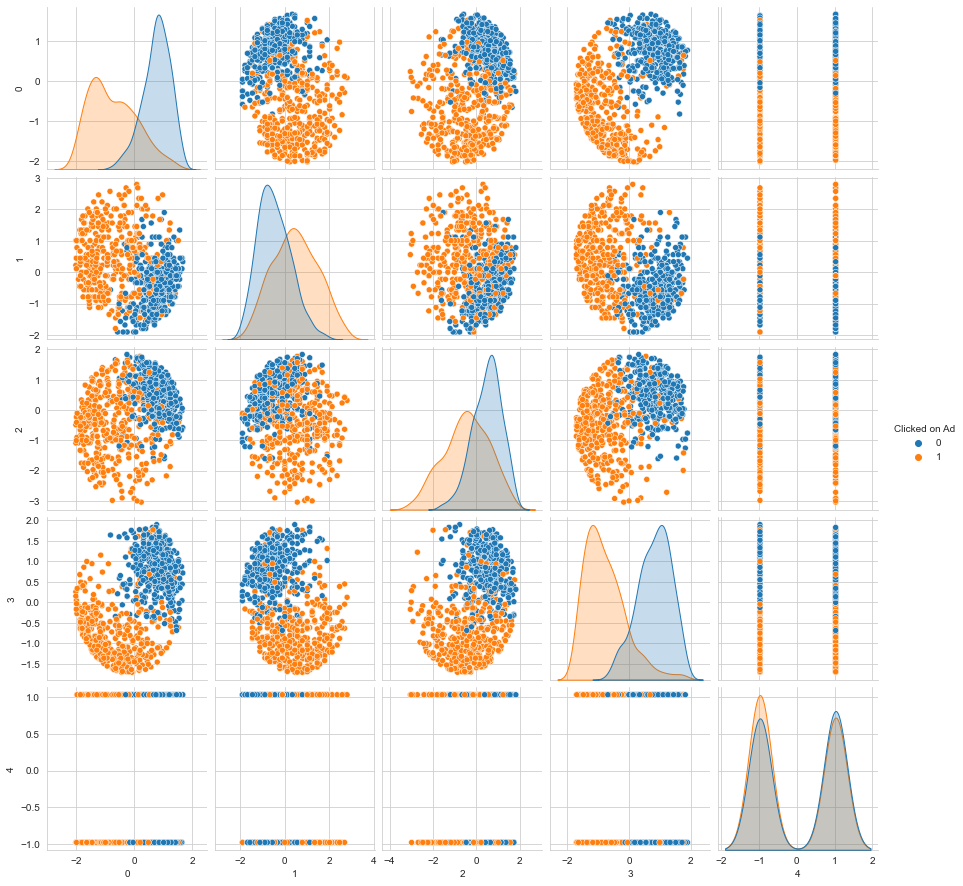

In [124]:
sns.pairplot(dff, hue="Clicked on Ad", palette= "tab10")